In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
X = pd.read_csv('/content/drive/My Drive/New_version_copd/X_data.csv.txt', header=None)
X=X.to_numpy()
m=X[0:1300]
X=np.vstack((X,m))


In [6]:
m1=X[0:1108]
m2=X[1108:2216]
m3=X[2216:3324]
m4=X[3324:]
np.save('/content/drive/My Drive/New_version_copd/vb_data.npy', m1)
np.save('/content/drive/My Drive/New_version_copd/md1_data.npy', m2)
np.save('/content/drive/My Drive/New_version_copd/md2_data.npy', m3)
np.save('/content/drive/My Drive/New_version_copd/cp_data.npy', m4)

In [7]:
X_test=np.load("/content/drive/My Drive/New_version_copd/vb_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/md1_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md2_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_data.npy")
X_train=np.vstack((m1,m2,m3))

In [ ]:
# import scipy.io as io
# io.savemat('/content/drive/My Drive/New_version_copd/vb.mat',{'G':X_test})
# io.savemat('/content/drive/My Drive/New_version_copd/md1.mat',{'G':m1})
# io.savemat('/content/drive/My Drive/New_version_copd/md2.mat',{'G':m2})
# io.savemat('/content/drive/My Drive/New_version_copd/cp.mat',{'G':m3})

In [8]:
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [10]:

X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
#model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
# model.add(layers.InputLayer(input_shape=(600,120)))
# model.add(layers.LSTM(150))
# model.add(Dropout(0.2))
# model.add(layers.Dense(100,activation='relu'))
# model.add(Dropout(0.2))

# model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_vbf',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_vbf',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_vbf',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_vbf',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_vbf',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_vbf',test_auc)

Epoch 1/500
52/52 [==============================] - 2s 12ms/step - loss: 1.4601 - accuracy: 0.3850 - auc: 0.6963 - val_loss: 1.3625 - val_accuracy: 0.4061 - val_auc: 0.7684
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 1.1954 - accuracy: 0.4898 - auc: 0.8179 - val_loss: 1.0793 - val_accuracy: 0.5099 - val_auc: 0.8560
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0885 - accuracy: 0.5184 - auc: 0.8477 - val_loss: 1.0589 - val_accuracy: 0.5009 - val_auc: 0.8519
Epoch 4/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0515 - accuracy: 0.5316 - auc: 0.8558 - val_loss: 0.9409 - val_accuracy: 0.6137 - val_auc: 0.8914
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0017 - accuracy: 0.5683 - auc: 0.8692 - val_loss: 1.0495 - val_accuracy: 0.5830 - val_auc: 0.8605
Epoch 6/500
52/52 [==============================] - 0s 5ms/step - loss: 0.9464 - accuracy: 0.6018 - auc: 0.8842 - val_loss: 0.8807 - 

In [12]:
X_test=np.load("/content/drive/My Drive/New_version_copd/md1_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md2_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [13]:

X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
#model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))




model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_md1f',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_md1f',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_md1f',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_md1f',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_md1f',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_md1f',test_auc)

Epoch 1/500
52/52 [==============================] - 2s 11ms/step - loss: 1.4587 - accuracy: 0.3717 - auc: 0.6939 - val_loss: 1.2312 - val_accuracy: 0.4883 - val_auc: 0.8016
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 1.2019 - accuracy: 0.4838 - auc: 0.8163 - val_loss: 1.0309 - val_accuracy: 0.5451 - val_auc: 0.8714
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 1.1017 - accuracy: 0.5039 - auc: 0.8421 - val_loss: 1.0847 - val_accuracy: 0.5235 - val_auc: 0.8524
Epoch 4/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0263 - accuracy: 0.5602 - auc: 0.8629 - val_loss: 1.0855 - val_accuracy: 0.5298 - val_auc: 0.8460
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0311 - accuracy: 0.5533 - auc: 0.8609 - val_loss: 1.0589 - val_accuracy: 0.4910 - val_auc: 0.8473
Epoch 6/500
52/52 [==============================] - 0s 5ms/step - loss: 0.9808 - accuracy: 0.5813 - auc: 0.8747 - val_loss: 0.9510 - 

In [14]:
X_test=np.load("/content/drive/My Drive/New_version_copd/md2_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md1_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/cp_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [15]:
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
#model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_md2f',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_md2f',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_md2f',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_md2f',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_md2f',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_md2f',test_auc)

Epoch 1/500
52/52 [==============================] - 1s 11ms/step - loss: 1.4401 - accuracy: 0.3945 - auc: 0.7052 - val_loss: 1.2647 - val_accuracy: 0.4179 - val_auc: 0.8015
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 1.1979 - accuracy: 0.5014 - auc: 0.8159 - val_loss: 1.1367 - val_accuracy: 0.5000 - val_auc: 0.8364
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0953 - accuracy: 0.5136 - auc: 0.8443 - val_loss: 1.0637 - val_accuracy: 0.5542 - val_auc: 0.8543
Epoch 4/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0203 - accuracy: 0.5559 - auc: 0.8646 - val_loss: 0.9473 - val_accuracy: 0.5532 - val_auc: 0.8865
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 0.9796 - accuracy: 0.5578 - auc: 0.8765 - val_loss: 1.0232 - val_accuracy: 0.5912 - val_auc: 0.8662
Epoch 6/500
52/52 [==============================] - 0s 5ms/step - loss: 0.9672 - accuracy: 0.5810 - auc: 0.8784 - val_loss: 0.9865 - 

In [20]:
X_test=np.load("/content/drive/My Drive/New_version_copd/cp_data.npy")
m1=np.load("/content/drive/My Drive/New_version_copd/vb_data.npy")
m2=np.load("/content/drive/My Drive/New_version_copd/md1_data.npy")
m3=np.load("/content/drive/My Drive/New_version_copd/md2_data.npy")
X_train=np.vstack((m1,m2,m3))
y_train=X_train[:,-1]
X_train=X_train[:,:-1]
y_test=X_test[:,-1]
X_test=X_test[:,:-1]

In [21]:
X_test_list=[]
y_test_list=[]
test_loss=[]
train_loss=[]
test_acc=[]
train_acc=[]
test_auc=[]
train_auc=[]
#X_train=pd.DataFrame(data=X_train)
#y_train=pd.DataFrame(data=y_train)
#y_test=pd.DataFrame(data=y_test)
#X_test=pd.DataFrame(data=X_test)  
one_hot_train_labels = to_categorical(y_train)
one_hot_test_labels = to_categorical(y_test)
X_test_list.append(X_test)
y_test_list.append(one_hot_test_labels)


model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_shape=(144,)))
#model.add(Dropout(0.2))
model.add(layers.Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))



model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])
history = model.fit(X_train, one_hot_train_labels, epochs=500, batch_size=64, validation_data=(X_test, one_hot_test_labels))
loss = history.history['loss']
val_loss = history.history['val_loss']
train_loss.append(loss)
test_loss.append(val_loss)
train_acc_1=history.history['accuracy']
val_acc = history.history['val_accuracy']
test_acc.append(val_acc)
train_acc.append(train_acc_1)
a=history.history['auc']
b=history.history['val_auc']
test_auc.append(b)
train_auc.append(a)
np.save('/content/drive/MyDrive/New_version_copd/train_loss_cpf',train_loss)
np.save('/content/drive/MyDrive/New_version_copd/test_loss_cpf',test_loss)
np.save('/content/drive/MyDrive/New_version_copd/train_acc_cpf',train_acc)
np.save('/content/drive/MyDrive/New_version_copd/test_acc_cpf',test_acc)
np.save('/content/drive/MyDrive/New_version_copd/train_auc_cpf',train_auc)
np.save('/content/drive/MyDrive/New_version_copd/test_auc_cpf',test_auc)

Epoch 1/500
52/52 [==============================] - 1s 11ms/step - loss: 1.4183 - accuracy: 0.4005 - auc: 0.7137 - val_loss: 1.1691 - val_accuracy: 0.5153 - val_auc: 0.8429
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 1.1726 - accuracy: 0.4898 - auc: 0.8224 - val_loss: 1.0744 - val_accuracy: 0.4901 - val_auc: 0.8602
Epoch 3/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0891 - accuracy: 0.5263 - auc: 0.8474 - val_loss: 1.0118 - val_accuracy: 0.5939 - val_auc: 0.8710
Epoch 4/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0354 - accuracy: 0.5608 - auc: 0.8616 - val_loss: 0.9798 - val_accuracy: 0.5523 - val_auc: 0.8753
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0196 - accuracy: 0.5576 - auc: 0.8647 - val_loss: 1.0197 - val_accuracy: 0.5578 - val_auc: 0.8678
Epoch 6/500
52/52 [==============================] - 0s 4ms/step - loss: 0.9591 - accuracy: 0.5966 - auc: 0.8818 - val_loss: 0.9185 - 

In [22]:


train_loss=np.load('/content/drive/MyDrive/New_version_copd/train_loss_vbf.npy')
test_loss=np.load('/content/drive/MyDrive/New_version_copd/test_loss_vbf.npy')
train_acc=np.load('/content/drive/MyDrive/New_version_copd/train_acc_vbf.npy')
test_acc=np.load('/content/drive/MyDrive/New_version_copd/test_acc_vbf.npy')
train_auc=np.load('/content/drive/MyDrive/New_version_copd/train_auc_vbf.npy')
test_auc=np.load('/content/drive/MyDrive/New_version_copd/test_auc_vbf.npy')

train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_md1f.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_md1f.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_md1f.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_md1f.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_md1f.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_md1f.npy')))

train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_md2f.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_md2f.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_md2f.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_md2f.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_md2f.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_md2f.npy')))

train_loss=np.vstack((train_loss,np.load('/content/drive/MyDrive/New_version_copd/train_loss_cpf.npy')))
test_loss=np.vstack((test_loss,np.load('/content/drive/MyDrive/New_version_copd/test_loss_cpf.npy')))
train_acc=np.vstack((train_acc,np.load('/content/drive/MyDrive/New_version_copd/train_acc_cpf.npy')))
test_acc=np.vstack((test_acc,np.load('/content/drive/MyDrive/New_version_copd/test_acc_cpf.npy')))
train_auc=np.vstack((train_auc,np.load('/content/drive/MyDrive/New_version_copd/train_auc_cpf.npy')))
test_auc=np.vstack((test_auc,np.load('/content/drive/MyDrive/New_version_copd/test_auc_cpf.npy')))

In [23]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

0.0058377173904081365 0.9953481703996658


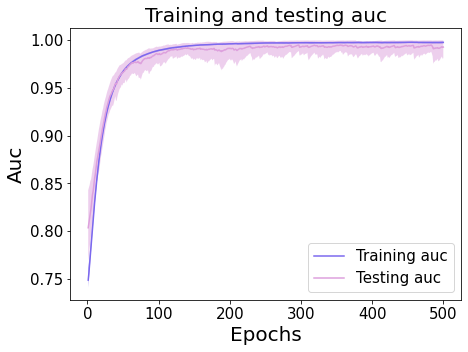

In [24]:
epochs = range(1, 500 + 1)
train_auc_min=[]
train_auc_max=[]
train_auc_mean=[]
for i in range(0, 500):
    maxv=max(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    minv=min(train_auc[0][i],train_auc[1][i],train_auc[2][i],train_auc[3][i])
    meanv=(train_auc[0][i]+train_auc[1][i]+train_auc[2][i]+train_auc[3][i]) /4
    train_auc_min.append(minv)
    train_auc_max.append(maxv)
    train_auc_mean.append(meanv)
test_auc_min=[]
test_auc_max=[]
test_auc_mean=[]
for i in range(0, 500):
    maxv=max(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    minv=min(test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i])
    meanv=(test_auc[0][i]+test_auc[1][i]+test_auc[2][i]+test_auc[3][i]) /4
    test_auc_min.append(minv)
    test_auc_max.append(maxv)
    test_auc_mean.append(meanv)

i=499
w = np.array([test_auc[0][i],test_auc[1][i],test_auc[2][i],test_auc[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_auc_mean), 'k', color='mediumslateblue',label='Training auc')
plt.fill_between(epochs, smooth_curve(train_auc_min), smooth_curve(train_auc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_auc_mean), 'k', color='plum',label='Testing auc')
plt.fill_between(epochs, smooth_curve(test_auc_min), smooth_curve(test_auc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing auc',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Auc',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingauc.png', dpi=600)
plt.show()

0.024031639425480374 0.9729241877794266


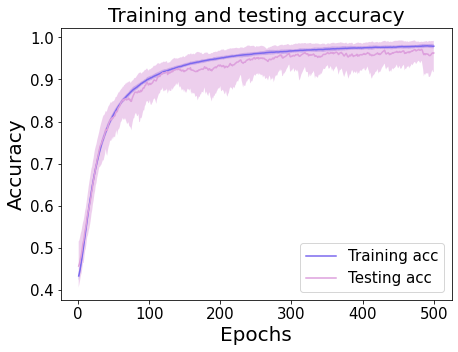

In [25]:
train_acc_min=[]
train_acc_max=[]
train_acc_mean=[]
for i in range(0, 500):
    maxv=max(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i])
    minv=min(train_acc[0][i],train_acc[1][i],train_acc[2][i],train_acc[3][i])
    meanv=(train_acc[0][i]+train_acc[1][i]+train_acc[2][i]+train_acc[3][i]) /4
    train_acc_min.append(minv)
    train_acc_max.append(maxv)
    train_acc_mean.append(meanv)

test_acc_min=[]
test_acc_max=[]
test_acc_mean=[]
for i in range(0, 500):
    maxv=max(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i])
    minv=min(test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i])
    meanv=(test_acc[0][i]+test_acc[1][i]+test_acc[2][i]+test_acc[3][i]) /4
    test_acc_min.append(minv)
    test_acc_max.append(maxv)
    test_acc_mean.append(meanv)
i=499
w = np.array([test_acc[0][i],test_acc[1][i],test_acc[2][i],test_acc[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)
f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_acc_mean), 'k', color='mediumslateblue',label='Training acc')
plt.fill_between(epochs, smooth_curve(train_acc_min), smooth_curve(train_acc_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_acc_mean), 'k', color='plum',label='Testing acc')
plt.fill_between(epochs, smooth_curve(test_acc_min), smooth_curve(test_acc_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(loc = 4,fontsize=15)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingacc7-5.png', dpi=600)
plt.show()


0.1491833367075846 0.14078975445590913


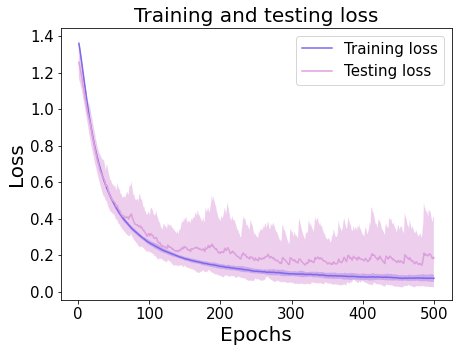

In [26]:
train_loss_min=[]
train_loss_max=[]
train_loss_mean=[]
for i in range(0, 500):
    maxv=max(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i])
    minv=min(train_loss[0][i],train_loss[1][i],train_loss[2][i],train_loss[3][i])
    meanv=(train_loss[0][i]+train_loss[1][i]+train_loss[2][i]+train_loss[3][i]) /4
    train_loss_min.append(minv)
    train_loss_max.append(maxv)
    train_loss_mean.append(meanv)
test_loss_min=[]
test_loss_max=[]
test_loss_mean=[]
for i in range(0, 500):
    maxv=max(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    minv=min(test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i])
    meanv=(test_loss[0][i]+test_loss[1][i]+test_loss[2][i]+test_loss[3][i]) /4
    test_loss_min.append(minv)
    test_loss_max.append(maxv)
    test_loss_mean.append(meanv)

i=499
w = np.array([test_loss[0][i],test_loss[1][i],test_loss[2][i],test_loss[3][i]])
s=np.std(w)
meanv=np.mean(w)
print(s, meanv)

f=plt.figure(figsize=[7,5])
plt.plot(epochs, smooth_curve(train_loss_mean), 'k', color='mediumslateblue',label='Training loss')
plt.fill_between(epochs, smooth_curve(train_loss_min), smooth_curve(train_loss_max),alpha=0.5, facecolor='mediumslateblue')
plt.plot(epochs, smooth_curve(test_loss_mean), 'k', color='plum',label='Testing loss')
plt.fill_between(epochs, smooth_curve(test_loss_min), smooth_curve(test_loss_max),alpha=0.5, facecolor='plum')
plt.title('Training and testing loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.legend(["train","test"],loc="upper left")
plt.legend(fontsize=15,loc="upper right")
#plt.savefig('/content/drive/My Drive/Colab Notebooks/ML/Trainingloss.png', dpi=600)
plt.show()

